In [1]:
import pandas as pd
from CoefPlot import CoefPlot
from scipy.stats import t
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import os

In [2]:
current_folder = globals()['_dh'][0]
rootdir = os.path.dirname(os.path.dirname(current_folder))
wdir = os.path.join(rootdir, '_2_intermediate', 'data')
outdir = os.path.join(rootdir, '_3_figures_tables', 'data')

In [3]:
df = pd.read_csv(os.path.join(wdir, '_dist_level_gap_regs_correlates_results.csv'))
df = df[(df.variable!='slavery (Nunn)')&
        (df.variable!='log(elevation)')&
        (df.variable!='migrant share')&
        (df.variable!='ethnic fragmentation')&
        (df.variable!='ethnic polarization')].reset_index(drop=True).copy(deep=True)

In [4]:
def rename_rhs(varlevel):
    
    rnd = {}
    rnd['oil field dummy'] = 'oil dummy'
    rnd['diamond mine dummy'] = 'diamond dummy'
    rnd['log(distance to capital)'] = 'ln(distance to capital)'
    rnd['log(distance to coast)'] = 'ln(distance to coast)'
    rnd['log(distance to national border)'] = 'ln(distance to border)'
    rnd['log(agricultural suitability)'] = 'agricultural suitability'
    rnd['log(stability of malaria transmission)'] = 'stability of malaria'
    rnd['log(terrain ruggedness)'] = 'terrain ruggedness'
    rnd['HYDE population density in 1950'] = 'ln(population density 1950)'
    rnd['log(distance to closest colonial railroad)'] = 'ln(distance to railroad)'
    rnd['log(distance to closest improved or better road in 1960)'] = 'ln(distance to road)'
    rnd['log(distance to closest Catholic mission (Nunn only))'] = 'ln(distance to catholic mission)'
    rnd['log(distance to closest Protestant mission)'] = 'ln(distance to protestant mission)'
    rnd['log(distance to closest precolonial empire (Besley and Reynal-Querol))'] = 'ln(distance to pre-colonial empire)'
    rnd['log(distance to closest precolonial state (Murdock))'] = 'ln(distance to pre-colonial state)'
    rnd['urban share'] = 'urban share (born < 1960)'
    rnd['agricultural labour share'] = 'agr e-share (born < 1960)'
    rnd['manufacturing + services labour share'] = 'man + ser empl-shr (born < 1960)'
    rnd['religious fragmentation'] = 'religious fragmentation'
    rnd['population share christian'] = 'christian population share'
    rnd['population share muslim'] = 'muslim population share'
    rnd['population share traditional'] = 'traditional population share'
    
    return rnd[varlevel]

def assign_grouping(varlevel):
    
    gd = {}
    gd['oil dummy'] = 'geography'
    gd['diamond dummy'] = 'geography'
    gd['ln(distance to capital)'] = 'geography'
    gd['ln(distance to border)'] = 'geography'
    gd['ln(distance to coast)'] = 'geography'
    gd['agricultural suitability'] = 'geography'
    gd['stability of malaria'] = 'geography'
    gd['terrain ruggedness'] = 'geography'
    gd['ln(population density 1950)'] = 'contemporary'
    gd['ln(distance to railroad)'] = 'history'
    gd['ln(distance to road)'] = 'history'
    gd['ln(distance to catholic mission)'] = 'history'
    gd['ln(distance to protestant mission)'] = 'history'
    gd['ln(distance to pre-colonial empire)'] = 'history'
    gd['ln(distance to pre-colonial state)'] = 'history'
    gd['urban share (born < 1960)'] = 'contemporary'
    gd['agr e-share (born < 1960)'] = 'contemporary'
    gd['man + ser empl-shr (born < 1960)'] = 'contemporary'
    gd['religious fragmentation'] = 'religious\ncomposition'
    gd['christian population share'] = 'religious\ncomposition'
    gd['muslim population share'] = 'religious\ncomposition'
    gd['traditional population share'] = 'religious\ncomposition'
    
    
def assign_order(varlevel):
    
    ordr = {}
    ordr['oil dummy'] = 11
    ordr['diamond dummy'] = 12
    ordr['ln(distance to capital)'] = 5
    ordr['ln(distance to border)'] = 6
    ordr['ln(distance to coast)'] = 7
    ordr['agricultural suitability'] = 9
    ordr['stability of malaria'] = 8
    ordr['terrain ruggedness'] = 10
    ordr['ln(population density 1950)'] = 1
    ordr['ln(distance to railroad)'] = 13
    ordr['ln(distance to road)'] = 14
    ordr['ln(distance to catholic mission)'] = 15
    ordr['ln(distance to protestant mission)'] = 16
    ordr['ln(distance to pre-colonial empire)'] = 17
    ordr['ln(distance to pre-colonial state)'] = 18
    ordr['urban share (born < 1960)'] = 2
    ordr['agr e-share (born < 1960)'] = 3
    ordr['man + ser empl-shr (born < 1960)'] = 4
    ordr['religious fragmentation'] = 22
    ordr['christian population share'] = 19
    ordr['muslim population share'] = 20
    ordr['traditional population share'] = 21
    
    return ordr[varlevel]

In [5]:
df['variable'] = df.apply(lambda x: rename_rhs(x['variable']), axis=1)
df['grouping'] = df.apply(lambda x: assign_grouping(x['variable']), axis=1)
df['ordr'] = df.apply(lambda x: assign_order(x['variable']), axis=1)
df['err_t'] = df.se*t.ppf(0.975, df.N)

dfn_m = df[df.gap=='christian-muslim'][['lit0', 'min10', 'variable', 'N']].reset_index(drop=True).copy()
dfn_t = df[df.gap=='christian-traditional'][['lit0', 'min10', 'variable', 'N']].reset_index(drop=True).copy()
dfn_m.columns = ['lit0', 'min10', 'variable', 'Nm']
dfn_t.columns = ['lit0', 'min10', 'variable', 'Nt']

df = pd.merge(df, dfn_m, on=['lit0', 'min10', 'variable'], how='left')
df = pd.merge(df, dfn_t, on=['lit0', 'min10', 'variable'], how='left')
df['variable'] = df.apply(lambda x: x['variable'] + '\n [$N_m$ = ' + str(x['Nm']) +  ', $N_t$ = ' + str(x['Nt']) +  ']', axis=1)

In [6]:
df

,gap,lit0,min10,variable,b,se,N,grouping,ordr,err_t,Nm,Nt
0,christian-muslim,no,no,"oil dummy\n [$N_m$ = 1898, $N_t$ = 1320]",-0.034315,0.022044,1898,None,11,0.043232,1898,1320
1,christian-muslim,no,no,"diamond dummy\n [$N_m$ = 1898, $N_t$ = 1320]",-0.012635,0.022739,1898,None,12,0.044596,1898,1320
2,christian-muslim,no,no,"ln(distance to capital)\n [$N_m$ = 1898, $N_t$...",0.080592,0.046526,1898,None,5,0.091248,1898,1320
3,christian-muslim,no,no,"ln(distance to border)\n [$N_m$ = 1897, $N_t$ ...",-0.004305,0.024657,1897,None,6,0.048357,1897,1319
4,christian-muslim,no,no,"ln(distance to coast)\n [$N_m$ = 1898, $N_t$ =...",0.072671,0.043838,1898,None,7,0.085975,1898,1320
...,...,...,...,...,...,...,...,...,...,...,...,...
171,christian-traditional,yes,yes,man + ser empl-shr (born < 1960)\n [$N_m$ = 17...,0.012741,0.045114,1277,None,4,0.088506,1705,1277
172,christian-traditional,yes,yes,"christian population share\n [$N_m$ = 1705, $N...",-0.110758,0.049685,1277,None,19,0.097472,1705,1277
173,christian-traditional,yes,yes,"muslim population share\n [$N_m$ = 1705, $N_t$...",0.113622,0.028615,1277,None,20,0.056139,1705,1277
174,christian-traditional,yes,yes,"traditional population share\n [$N_m$ = 1705, ...",-0.008391,0.014474,1277,None,21,0.028396,1705,1277


In [7]:
dfi = df[(df['min10'] == 'no') & (df['lit0'] == 'no')].reset_index(drop=True).copy(deep=True)

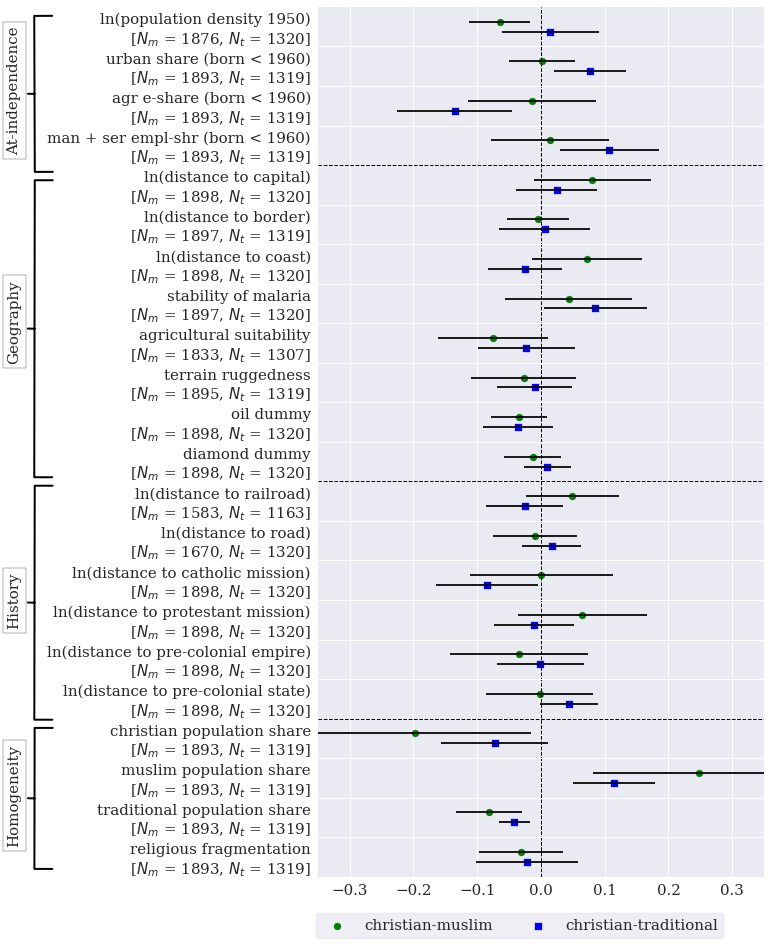

In [8]:
cp = CoefPlot(dfi)
f = cp.grouped_dotplot('b', 'gap', 'variable', err='err_t', figsize=(8,16), 
                        order_groups_by_variable='ordr',
                        within_group_order=['christian-muslim', 'christian-traditional'],
                        zero_line=True, group_separators=True,
                        legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)

ax = f.axes[0]
brack1 = ax.annotate('At-independence', xy=(-0.63, 0.9), xytext=(-0.68, 0.83), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=5.2, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack2 = ax.annotate('Geography', xy=(-0.63, 0.63), xytext=(-0.68, 0.59), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=9.9, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack3 = ax.annotate('History', xy=(-0.63, 0.315), xytext=(-0.68, 0.285), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=7.8, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

brack4 = ax.annotate('Homogeneity', xy=(-0.63, 0.09), xytext=(-0.68, 0.035), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=15, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=1.2,angleB=1.2',
                                 connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                 lw=2.0, color='black'))

ax.axhline(y=7, linestyle='--', color='black', linewidth=1)
ax.axhline(y=19, linestyle='--', color='black', linewidth=1)
ax.axhline(y=35, linestyle='--', color='black', linewidth=1)
ax.set_xlim([-0.35, 0.35])

brack1.set_rotation(90)
brack2.set_rotation(90)
brack3.set_rotation(90)
brack4.set_rotation(90)

In [9]:
for lit0 in ['no', 'yes']:
    
    if lit0 == 'yes':
        litomsg = '_withlito'
    else:
        litomsg = '_nolito'
    
    for min10 in ['no', 'yes']:
        if min10 == 'no':
            outsuff = 's'
        else:
            outsuff = 's_min10'
        dfi = df[(df['min10'] == min10) & (df['lit0'] == lit0)].reset_index(drop=True).copy(deep=True)
                ########################################################################

        cp = CoefPlot(dfi)
        f = cp.grouped_dotplot('b', 'gap', 'variable', err='err_t', figsize=(8,16), 
                                order_groups_by_variable='ordr',
                                within_group_order=['christian-muslim', 'christian-traditional'],
                                zero_line=True, group_separators=True,
                                legend=True, legend_bbox=(-0.02,-0.08), legend_columns=3)
        ax = f.axes[0]
        brack1 = ax.annotate('At-independence', xy=(-0.63, 0.9), xytext=(-0.68, 0.83), 
                         xycoords='axes fraction', 
                         textcoords='axes fraction', 
                         fontsize=15, ha='center', va='bottom',
                         bbox=dict(boxstyle='square', fc='white', ec='black'),
                         arrowprops=dict(arrowstyle='-[, widthB=5.2, lengthB=1.2,angleB=1.2',
                                         connectionstyle="arc,angleA=0,angleB=-181,armA=0,armB=30,rad=0",
                                         lw=2.0, color='black'))

        brack2 = ax.annotate('Geography', xy=(-0.63, 0.63), xytext=(-0.68, 0.59), 
                         xycoords='axes fraction', 
                         textcoords='axes fraction', 
                         fontsize=15, ha='center', va='bottom',
                         bbox=dict(boxstyle='square', fc='white', ec='black'),
                         arrowprops=dict(arrowstyle='-[, widthB=9.9, lengthB=1.2,angleB=1.2',
                                         connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                         lw=2.0, color='black'))

        brack3 = ax.annotate('History', xy=(-0.63, 0.315), xytext=(-0.68, 0.285), 
                         xycoords='axes fraction', 
                         textcoords='axes fraction', 
                         fontsize=15, ha='center', va='bottom',
                         bbox=dict(boxstyle='square', fc='white', ec='black'),
                         arrowprops=dict(arrowstyle='-[, widthB=7.8, lengthB=1.2,angleB=1.2',
                                         connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                         lw=2.0, color='black'))

        brack4 = ax.annotate('Homogeneity', xy=(-0.63, 0.09), xytext=(-0.68, 0.035), 
                         xycoords='axes fraction', 
                         textcoords='axes fraction', 
                         fontsize=15, ha='center', va='bottom',
                         bbox=dict(boxstyle='square', fc='white', ec='black'),
                         arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=1.2,angleB=1.2',
                                         connectionstyle="arc,angleA=0,angleB=-181.3,armA=0,armB=30,rad=0",
                                         lw=2.0, color='black'))

        ax.axhline(y=7, linestyle='--', color='black', linewidth=1)
        ax.axhline(y=19, linestyle='--', color='black', linewidth=1)
        ax.axhline(y=35, linestyle='--', color='black', linewidth=1)
        ax.set_xlim([-0.35, 0.35])

        brack1.set_rotation(90)
        brack2.set_rotation(90)
        brack3.set_rotation(90)
        brack4.set_rotation(90)

        f.savefig('{}/_4_covariates_dist_level_gap_reg{}{}.pdf'.format(outdir, outsuff, litomsg), bbox_inches='tight', dpi=100)
        plt.close(f)